In [98]:
import pandas as pd

# Carica il file Excel
df = pd.read_excel('/Users/andreacip/Downloads/dpc-covid19-ita-andamento-nazionale.xlsx')

# Assicurati che la colonna della data sia nel formato datetime e rimuovi l'orario
df['data'] = pd.to_datetime(df['data']).dt.normalize()

# Imposta la colonna della data come indice del DataFrame
df.set_index('data', inplace=True)

# Escludi la colonna con intestazione "test"
if 'test' in df.columns:
    df.drop(columns=['test'], inplace=True)

# Raggruppa i dati per semestre e calcola la somma
df_semestrale = df.resample('6M').sum()

# Converti l'indice in formato 'YYYY-MM-dd' senza cambiare il tipo di indice
df_semestrale.index = df_semestrale.index.strftime('%d-%m-%Y')

# Formatta i numeri grandi senza utilizzare il punto come separatore delle migliaia
pd.options.display.float_format = '{:,.0f}'.format

# Visualizza le prime righe del DataFrame semestrale con stile
print("DataFrame semestrale:")
display(df_semestrale.head().style.background_gradient(cmap='coolwarm'))

# Calcola la media dei 'nuovi_positivi' per semestre e rimuovi l'orario se presente
media_nuovi_positivi_semestrale = df['nuovi_positivi'].resample('6M').mean()
media_nuovi_positivi_semestrale.index = media_nuovi_positivi_semestrale.index.strftime('%d-%m-%Y')

# Visualizza la media semestrale dei nuovi positivi con stile
print("\nMedia semestrale dei nuovi positivi:")
display(media_nuovi_positivi_semestrale.to_frame(name='Media Nuovi Positivi').style.background_gradient(cmap='coolwarm'))

# Calcola altre statistiche per ogni semestre
statistiche_semestrali = df['nuovi_positivi'].resample('6M').agg(['mean', 'median', 'min', 'max', 'std'])
statistiche_semestrali.index = statistiche_semestrali.index.strftime('%d-%m-%Y')

# Visualizza le statistiche semestrali dei nuovi positivi con stile
print("\nStatistiche semestrali dei nuovi positivi:")
display(statistiche_semestrali.style.background_gradient(cmap='coolwarm'))


DataFrame semestrale:


,ricoverati_con_sintomi,isolamento_domiciliare,totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,
29-02-2020,1337,1716,3375,1120,146,96,3617,68904
31-08-2020,1672455,6054210,7914661,268183,22790833,4943236,35648730,699294349
28-02-2021,3266801,70249737,73873427,2659438,180328835,10792882,264995162,3968245667
31-08-2021,2152931,48342502,50780649,1605859,669606087,22275265,742662024,11860237514
28-02-2022,1527150,135038227,136717365,8104318,1044162511,24788972,1205669081,22922585585



Media semestrale dei nuovi positivi:


,Media Nuovi Positivi
data,
29-02-2020,186.666667
31-08-2020,1457.516304
28-02-2021,14693.027624
31-08-2021,8727.494565
28-02-2022,44775.237569
31-08-2022,48527.005435
28-02-2023,20582.469613
31-08-2023,1970.956522
29-02-2024,4185.164835



Statistiche semestrali dei nuovi positivi:


,mean,median,min,max,std
data,,,,,
29-02-2020,186.666667,229.500000,78,250,79.058628
31-08-2020,1457.516304,635.500000,114,6557,1652.154225
28-02-2021,14693.027624,13720.000000,978,40902,10002.539305
31-08-2021,8727.494565,6342.000000,389,26824,7412.332099
28-02-2022,44775.237569,12877.000000,1516,220532,59689.730644
31-08-2022,48527.005435,41874.500000,7537,142967,27986.390890
28-02-2023,20582.469613,18797.000000,1497,65925,14426.136287
31-08-2023,1970.956522,1458.500000,195,6706,1445.047895
29-02-2024,4185.164835,3976.500000,80,16615,3452.090425


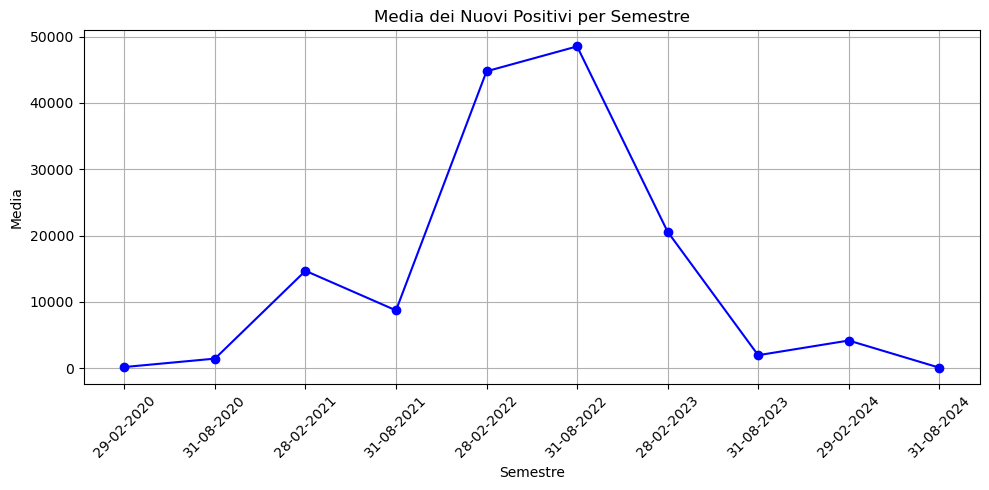

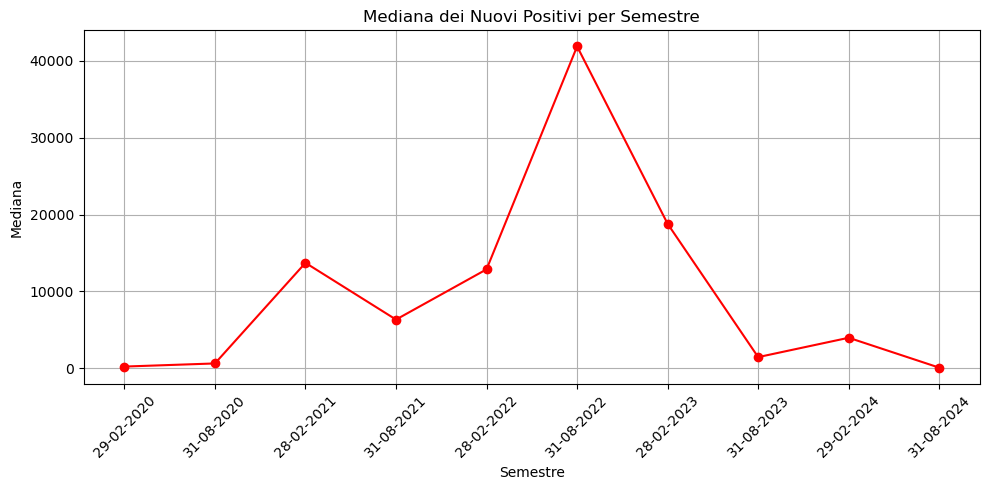

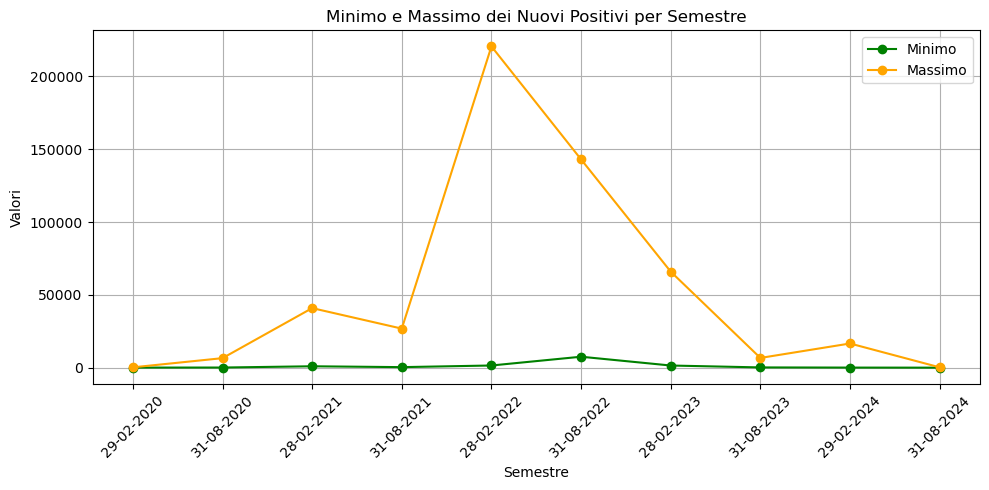

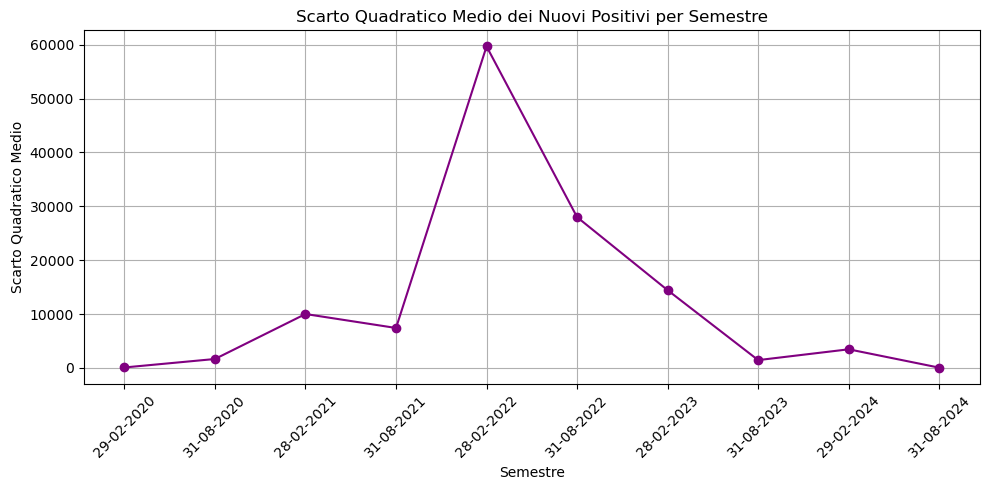

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumiamo che 'statistiche_semestrali' sia il tuo DataFrame già caricato con i dati

# Grafico della media dei nuovi positivi per semestre
plt.figure(figsize=(10, 5))
plt.plot(statistiche_semestrali.index, statistiche_semestrali['mean'], marker='o', color='blue')
plt.title('Media dei Nuovi Positivi per Semestre')
plt.xlabel('Semestre')
plt.ylabel('Media')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico della mediana dei nuovi positivi per semestre
plt.figure(figsize=(10, 5))
plt.plot(statistiche_semestrali.index, statistiche_semestrali['median'], marker='o', color='red')
plt.title('Mediana dei Nuovi Positivi per Semestre')
plt.xlabel('Semestre')
plt.ylabel('Mediana')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico del minimo e del massimo dei nuovi positivi per semestre
plt.figure(figsize=(10, 5))
plt.plot(statistiche_semestrali.index, statistiche_semestrali['min'], marker='o', color='green', label='Minimo')
plt.plot(statistiche_semestrali.index, statistiche_semestrali['max'], marker='o', color='orange', label='Massimo')
plt.title('Minimo e Massimo dei Nuovi Positivi per Semestre')
plt.xlabel('Semestre')
plt.ylabel('Valori')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Grafico dello scarto quadratico medio dei nuovi positivi per semestre
plt.figure(figsize=(10, 5))
plt.plot(statistiche_semestrali.index, statistiche_semestrali['std'], marker='o', color='purple')
plt.title('Scarto Quadratico Medio dei Nuovi Positivi per Semestre')
plt.xlabel('Semestre')
plt.ylabel('Scarto Quadratico Medio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumiamo che 'df' sia il tuo DataFrame già caricato con i dati

# Grafico dei nuovi positivi nel tempo
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['data']), df['nuovi_positivi'], marker='o')
plt.title('Nuovi Positivi nel Tempo')
plt.xlabel('Data')
plt.ylabel('Nuovi Positivi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico dei deceduti nel tempo
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['data']), df['deceduti'], marker='o', color='red')
plt.title('Deceduti nel Tempo')
plt.xlabel('Data')
plt.ylabel('Deceduti')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Riassunto delle statistiche
print(f"Media dei nuovi positivi: {df['nuovi_positivi'].mean():,.2f}")
print(f"Mediana dei totale casi: {df['totale_casi'].median():,.0f}")
print(f"Totale tamponi effettuati: {df['tamponi'].sum():,.0f}")

KeyError: 'data'

<Figure size 1000x500 with 0 Axes>

In [87]:
print(df.columns)

Index(['ricoverati_con_sintomi', 'isolamento_domiciliare', 'totale_positivi',
       'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi',
       'tamponi'],
      dtype='object')


NameError: name 'printhead' is not defined